In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

39200000
(50000, 784)
39200000
50000


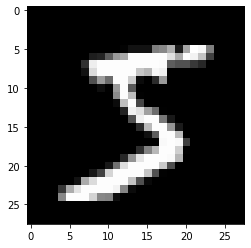

In [13]:
from matplotlib import pyplot as plt
# import numpy as np

plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.size)
print(x_train.shape)
print(50000*784)
print(len(x_train))

In [15]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(f'n = {n} and c = {c}')
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

n = 50000 and c = 784
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


C:\Users\edgar\AppData\Local\Temp\ipykernel_32224\2771904356.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(


In [30]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)
print(weights)
print(bias)

tensor([[ 0.0279,  0.0459, -0.0230,  ..., -0.0101, -0.0035,  0.0211],
        [ 0.0326,  0.0325, -0.0057,  ...,  0.0190,  0.0425,  0.0329],
        [-0.0046, -0.0514, -0.0809,  ..., -0.0021, -0.0593,  0.0460],
        ...,
        [-0.0394,  0.0134, -0.0028,  ...,  0.0416, -0.0258,  0.0002],
        [-0.0446,  0.0081, -0.0021,  ..., -0.0225,  0.0430,  0.0071],
        [ 0.0729, -0.0071,  0.0038,  ..., -0.0180,  0.0250,  0.0067]],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [33]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [34]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([ 9.8769,  9.4170,  8.8188,  9.8787,  9.8846,  9.6646,  9.3570,  9.6765,
         9.7419,  8.7982,  9.7953,  8.7244, 10.1145, 10.0562,  9.5700,  9.8071,
        10.5841,  9.4146,  9.0964, 10.1112, 10.3873,  7.9781,  9.9856,  9.7916,
         8.0170,  8.7619,  9.9015, 10.4486, 10.2783,  9.4915, 10.7670, 10.7654,
         8.6802,  9.5493,  9.2779,  7.8917,  9.9063,  8.4140, 10.3874,  8.8394,
         9.5568,  9.2022,  9.9790, 10.3809,  9.3157, 10.2439, 10.9863,  9.8572,
         8.8640,  9.9111,  9.2055, 10.7138, 10.0953,  9.4175,  9.1919, 11.2064,
         9.9114, 10.2073,  9.8185,  9.8759,  8.7049,  9.5752,  9.1417, 10.8222],
       grad_fn=<SumBackward1>)
tensor([-1.5830, -2.3140, -2.6907, -2.1422, -3.1354, -2.4837, -2.3064, -2.5650,
        -1.9592, -2.7165], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [35]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [36]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3417, grad_fn=<NegBackward0>)
